<a href="https://colab.research.google.com/github/mamuncseru/deep_understanding_deep_learning/blob/main/DUDL_metaparameters_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

## Mean-Squared error

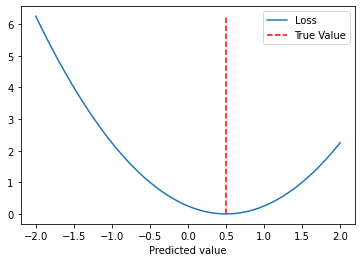

In [4]:
# loss function
lossfunMSE = nn.MSELoss()

# create predictions and real answer
yHat = torch.linspace(-2, 2, 101)
y = torch.tensor(.5)

# compute MSE loss function
L = np.zeros(101)
for i, yy in enumerate(yHat):
    L[i] = lossfunMSE(yy, y)
    
plt.plot(yHat, L, label='Loss')
plt.plot([y, y], [0, np.max(L)], 'r--', label='True Value')
plt.xlabel('Predicted value')
plt.legend()
plt.show()

## Binary Cross Entropy

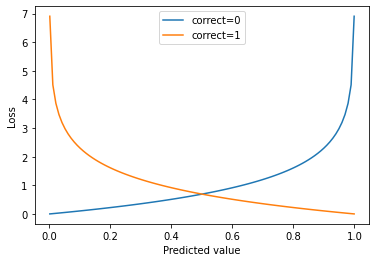

In [5]:
# loss function
lossfunBCE = nn.BCELoss()

# create predictions and real answer
yHat = torch.linspace(.001, .999, 101)
y1 = torch.tensor(0.)
y2 = torch.tensor(1.)

# compute MSE loss function
L = np.zeros((101, 2))
for i, yy in enumerate(yHat):
    L[i,0] = lossfunBCE(yy, y1)
    L[i,1] = lossfunBCE(yy, y2)

plt.plot(yHat, L)
plt.xlabel('Predicted value')
plt.ylabel('Loss')
plt.legend(['correct=0', 'correct=1'])
plt.show()

In [7]:
yHat = torch.tensor(2.)
# print(lossfunBCE(yHat, y2))

# convert to prob via sigmoid
sig = nn.Sigmoid()
print(lossfunBCE(sig(yHat), y2))

tensor(0.1269)


In [9]:
lossfunBCE = nn.BCEWithLogitsLoss()
yHat = torch.tensor(2.)
print(lossfunBCE(yHat, y2))

tensor(0.1269)


## Categorical Cross Entropy

In [14]:
# loss function
lossfunCCE = nn.CrossEntropyLoss()

# vector of output layer (pre-softmax)
yHat = torch.tensor([[1., 4, 3]])

for i in range(3):
    correctAnswer = torch.tensor([i])
    thisLoss = lossfunCCE(yHat, correctAnswer).item()
    print('Loss when correct answer is %g: %g' %(i, thisLoss))

Loss when correct answer is 0: 3.34901
Loss when correct answer is 1: 0.349012
Loss when correct answer is 2: 1.34901


In [16]:
# Repeat using pre-softmaxified output (incorrect)
sm = nn.Softmax(dim=1)
yHat_sm = sm(yHat)

for i in range(3):
    correctAnswer = torch.tensor([i])
    thisLoss = lossfunCCE(yHat_sm, correctAnswer).item()
    print('Loss when correct answer is %g: %g' %(i, thisLoss))

Loss when correct answer is 0: 1.43658
Loss when correct answer is 1: 0.766318
Loss when correct answer is 2: 1.21221


In [17]:
# compare raw, softmax, and log-softmax outputs
sm = nn.LogSoftmax(dim=1)
yHat_logsm = sm(yHat)

# print them
print(yHat)
print(yHat_sm)
print(yHat_logsm)

tensor([[1., 4., 3.]])
tensor([[0.0351, 0.7054, 0.2595]])
tensor([[-3.3490, -0.3490, -1.3490]])


## Creating your own custom loss function

In [18]:
class myLoss(nn.Module):
    def __init__(slf):
        super().__init__()

    def forward(self, x, y):
        loss = torch.abs(x-y)
        return loss

# test it out!
lfun = myLoss()
lfun(torch.tensor(4), torch.tensor(5.2))

tensor(1.2000)